<a href="https://www.kaggle.com/code/banditobarbosa/aai-510-module-1?scriptVersionId=95837122" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


In [2]:
#Loading Dataset
#Removing rows with Target value as null
train_data = pd.read_csv("../input/home-credit-default-risk/application_train.csv")
train_data = train_data[~train_data['TARGET'].isnull()]
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:

train_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [4]:
correlations = train_data.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(11))


Most Positive Correlations:
 DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


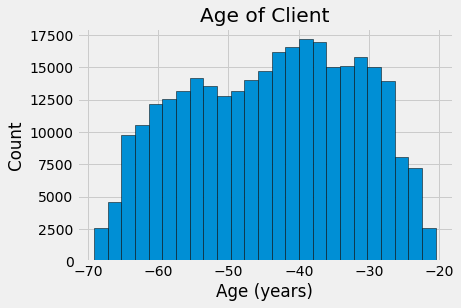

In [5]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train_data['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

The age of a client is the most correlated feature in regards to having the ability to qualify for a loan. It shows that as the person is older, they are more likely to repay their loans. This is true as older people have had more time in school and in their workplace, so they have a salary or hourly income that allow them to pay on time. 

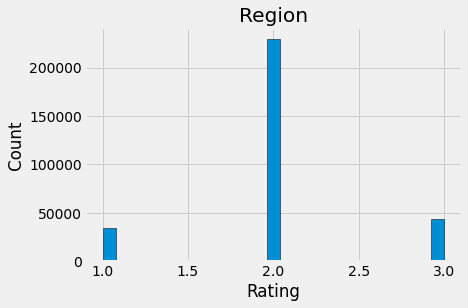

In [6]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of Region Rating 
plt.hist(train_data['REGION_RATING_CLIENT_W_CITY'], edgecolor = 'k', bins = 25)
plt.title('Region'); plt.xlabel('Rating'); plt.ylabel('Count');

This variable had the second highest correlation according to the .corr() function used. This appears to have some form of rating of loans that are received based on the region. Demographics play a huge role in who is able to receive a loan. Based on the type of people that live in certain areas, loans are either given or not given based on region.

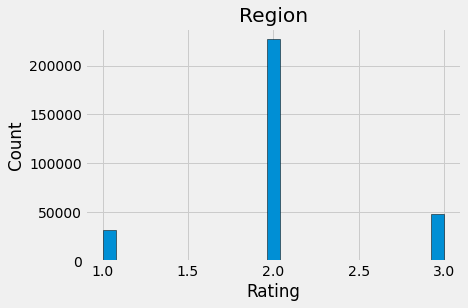

In [7]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of Region Rating 
plt.hist(train_data['REGION_RATING_CLIENT'], edgecolor = 'k', bins = 25)
plt.title('Region'); plt.xlabel('Rating'); plt.ylabel('Count');

This is the next variable with the most correlated feature. To be honest I'm not quote sure what this variable represents as far as being able to be accepted for a loan. But this graph says that those who fall within this middle region are able to receive a loan far more than those who are on the domain of this graph. 

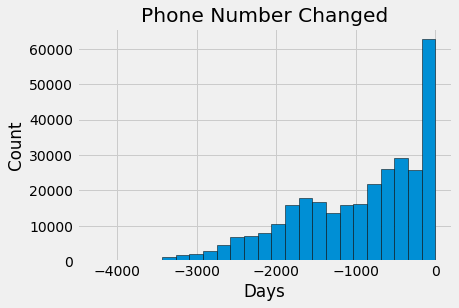

In [8]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of Region Rating 
plt.hist(train_data['DAYS_LAST_PHONE_CHANGE'] , edgecolor = 'k', bins = 25)
plt.title('Phone Number Changed'); plt.xlabel('Days'); plt.ylabel('Count');

This variable is an indicator of those who have had a change in their phone number. Those who have not had a change in phone number are the ones that were more likely to receive a loan. A change in phone number looks like it drastically changes the ability to get a loan.

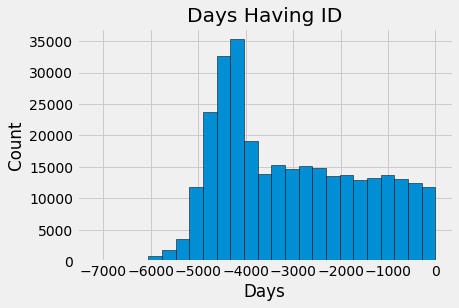

In [9]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of Region Rating 
plt.hist(train_data['DAYS_ID_PUBLISH'], edgecolor = 'k', bins = 25)
plt.title('Days Having ID'); plt.xlabel('Days'); plt.ylabel('Count');

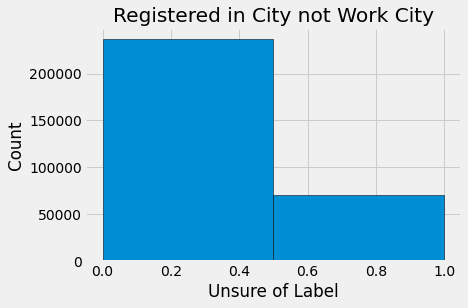

In [10]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of Region Rating 
plt.hist(train_data['REG_CITY_NOT_WORK_CITY'], edgecolor = 'k', bins = 2)
plt.title('Registered in City not Work City'); plt.xlabel('Unsure of Label'); plt.ylabel('Count');

So this is probably one of the most interesting features. It shows that there is a concerning reason for this to be correlated, but there is no way for me to check to see what the units are on the bottom. 

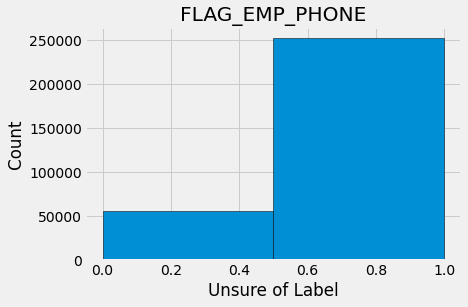

In [11]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of Region Rating 
plt.hist(train_data['FLAG_EMP_PHONE'], edgecolor = 'k', bins = 2)
plt.title('FLAG_EMP_PHONE'); plt.xlabel('Unsure of Label'); plt.ylabel('Count');

This feature is also another that shows high correlation with the target. I am not sure how to make sure what the label represents on the x axis. However, one can see that this feature makes a clear distinction of those who receive a loan and those that do not. I think that the most important part is to see what the strongest correlations are, and then determine why they happen to be this way.